<a href="https://colab.research.google.com/github/KumarGaurav20/Spam-Emails/blob/main/Testing_Our_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TESTING OUR MODEL-BAYES CLASSIFIER

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Notebook Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##CONSTANTS

In [3]:
TOKEN_SPAM_PROB_FILE = '/content/gdrive/MyDrive/COLAB DATA/prob-spam.txt'
TOKEN_HAM_PROB_FILE = '/content/gdrive/MyDrive/COLAB DATA/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = '/content/gdrive/MyDrive/COLAB DATA/prob-all-tokens.txt'



TEST_FEATURE_MATRIX = '/content/gdrive/MyDrive/COLAB DATA/test-features.txt'
TEST_TARGET_FILE = '/content/gdrive/MyDrive/COLAB DATA/test-target.txt'

VOCAB_SIZE = 2500
# FOR VISUALIZAION
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'




## ACESSING THE DATA

In [4]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [5]:
X_test[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 6., ..., 0., 0., 0.]])

In [6]:
y_test[:5], y_test[-5:]   #0->NONSPAM, 1->SPAM

(array([1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0.]))

# CALCULATING THE JOINT PROBABILITY

## JOINT PROBABILIY OF SPAM


$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$

PRIOR

In [7]:
# NOTE:Prior is the distribution that is imputed before the model starts to see any data.
# As we already know the prior P(Spam), we'll use that. 
PROB_SPAM = 0.3116

In [8]:
# TAKING LOG ON BOTH SIDE OF THE Eqn
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)


In [9]:
joint_log_spam

array([  3.21926579,  13.35310029,  19.22329985, ..., -31.24582095,
        -4.77833586, -17.03309585])

## JOINT PROBABILITY OF NONSPAM

$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$


In [10]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [11]:
joint_log_ham


array([-11.05412802, -36.85845149, -38.27162954, ...,   4.83559496,
         0.28826957,   3.12480869])

# MAKING PREDICION

THEORY: WE'LL CALCULATE THE PROB OF A TOKEN BEING A SPAM OR NONSPAM. IF THE PROB OF THAT TOKEN BEING A SPAM IS HIGHER, WE'LL LABEL THAT TOKEN AS A SPAM OR VICE-VERSA.

$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$

In [12]:
# y_hat
prediction = joint_log_spam > joint_log_ham

In [13]:
prediction

array([ True,  True,  True, ..., False, False, False])

In [14]:
# Converting the True and False into binary value for easier calculation
prediction*1

array([1, 1, 1, ..., 0, 0, 0])

CHECKING OUR DATA

In [15]:
prediction[:5]*1, y_test[:5]

(array([1, 1, 1, 0, 1]), array([1., 1., 1., 1., 1.]))

AS WE CAN SEE THAT 4/5 OF THE FIRST 5 VALUES MATCH ACCORDING TO OUR PREDITION

# EVALUATING OUR DATA

1.TESTING ACCURACY

In [16]:
correct_docs = (y_test == prediction).sum()     #CORRECT GUESS
numdocs_wrong = X_test.shape[0] - correct_docs  #WRONG GUESS
accuracy= correct_docs/len(X_test)

In [17]:
print(f'Our predicion is {accuracy*100} accurate')

Our predicion is 96.98375870069606 accurate


## VISUALIZING OUR DATA

In [18]:
# Filling Data for decision boundary
linedata = np.linspace(start=-14000, stop=1, num=1000)

In [19]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

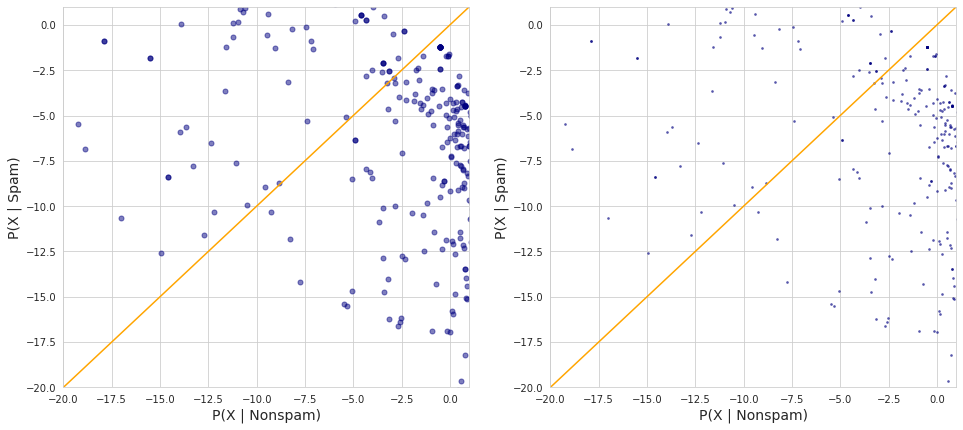

In [20]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-20, 1])
plt.ylim([-20, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-20, 1])
plt.ylim([-20, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


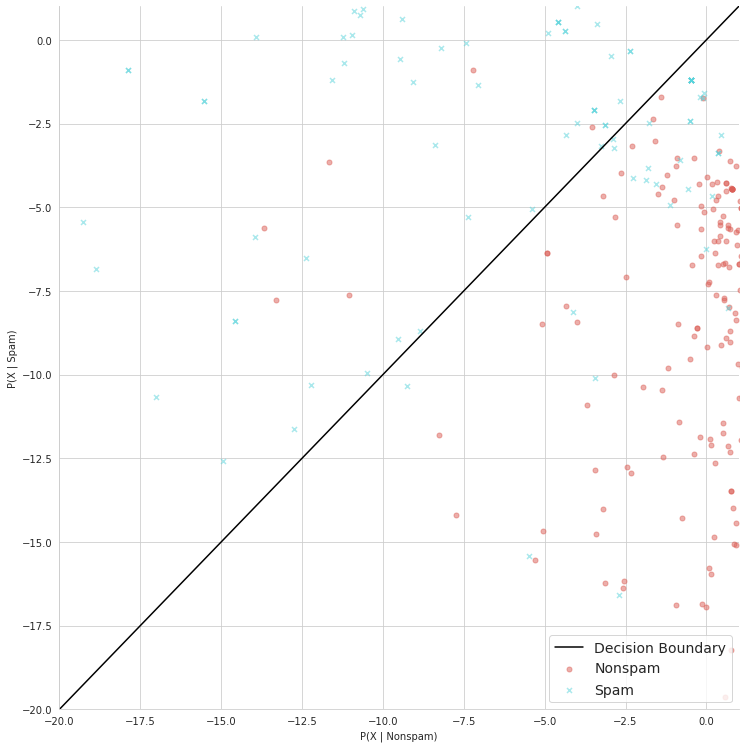

In [25]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=10.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-20, 1])
plt.ylim([-20, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### MAKING OUR CALCULATIONS EASIER

**THEORY:** Since we are comparing 2 variables and (A+B)/C > (D+E)/C is equivalent to (A+B) > (D+E), we can remove the C that is P(X). So now, the equation will be equivalent to=
${P(X \, | \, Spam) \, P(Spam)}$ > ${P(X \, | \, Ham) \, (1-P(Ham))}$